In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv(r'./data/Mall_Customers.csv')
data.set_index("CustomerID")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
Feature = data[["Annual Income (k$)", "Spending Score (1-100)"]]
Feature.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


In [6]:
# Clustering
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=15.0, min_samples=15.0)
data["Cluster"] = model.fit_predict(Feature)

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1


In [8]:
# Evaluation
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(Feature, data.Cluster.values.ravel())

0.3152164538254366

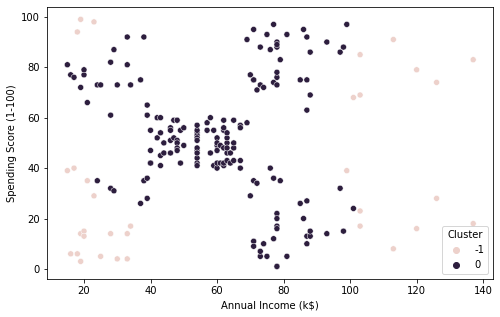

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x="Annual Income (k$)", 
               y="Spending Score (1-100)", hue="Cluster")
plt.show()

In [10]:
# Parameter optimization
eps = np.linspace(5, 100, 200)
minsamples = np.arange(5, 50, 3)

In [11]:
pscore = 0
for r in eps:
    for m in minsamples:
        model1 = DBSCAN(eps=r, min_samples=m)
        data["Cluster"] = model1.fit_predict(Feature)
        if len(set(model1.labels_)) == 1:
            continue
        score = silhouette_score(Feature, data.Cluster.values.ravel())
        if score > pscore:
            pscore = score
            print(f"[Eps: {r}| MinSamples: {m}] : {score}")

[Eps: 5.0| MinSamples: 5] : 0.1135163893571667
[Eps: 5.477386934673367| MinSamples: 5] : 0.14290298979655586
[Eps: 5.954773869346734| MinSamples: 5] : 0.15593831430132987
[Eps: 6.432160804020101| MinSamples: 5] : 0.2341227329782859
[Eps: 7.386934673366834| MinSamples: 5] : 0.31595469080938154
[Eps: 7.864321608040202| MinSamples: 5] : 0.3550982050619174
[Eps: 8.341708542713569| MinSamples: 5] : 0.39201313128562093
[Eps: 8.819095477386934| MinSamples: 5] : 0.4321128619542937
[Eps: 9.296482412060302| MinSamples: 5] : 0.4422214837114166
[Eps: 23.618090452261306| MinSamples: 11] : 0.45348664379676


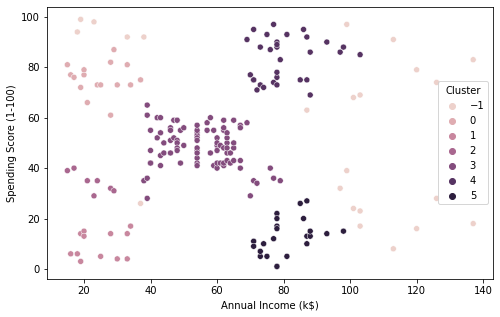

In [12]:
model2 = DBSCAN(eps=9, min_samples=5)
data['Cluster'] = model2.fit_predict(Feature)
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x="Annual Income (k$)", 
               y="Spending Score (1-100)", hue="Cluster")
plt.show()

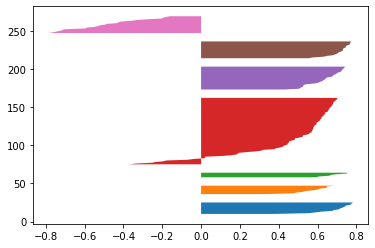

In [13]:
sscore = silhouette_score(
    data[['Annual Income (k$)','Spending Score (1-100)']],
    data[['Cluster']].values.ravel()
)
ssample = silhouette_samples(
    data[['Annual Income (k$)','Spending Score (1-100)']],
    data[['Cluster']].values.ravel()
)
ylow = 10
for c in set(model2.labels_):
    cSample = ssample[data['Cluster']==c]
    cSample.sort()
    yup = ylow + cSample.shape[0]
    plt.fill_betweenx(np.arange(ylow, yup), 0,cSample )
    ylow = yup + 10
plt.show()

In [14]:
# With 3 Features
Feature = data[["Age","Annual Income (k$)", "Spending Score (1-100)"]]
model3 = DBSCAN(eps=9, min_samples=10)
data['Cluster'] = model3.fit_predict(Feature)

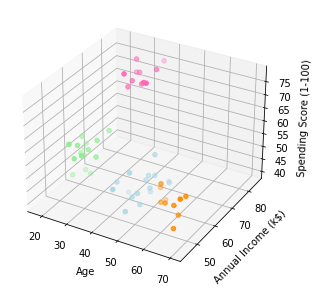

In [15]:
plt.figure(figsize=(10,5))
axes = plt.axes(projection='3d')
axes.scatter3D(
    data.Age[data['Cluster']==0], data['Annual Income (k$)'][data['Cluster']==0],
    data['Spending Score (1-100)'][data['Cluster']==0], color='darkorange'
    , label="Cluster 0"
)
axes.scatter3D(
    data.Age[data['Cluster']==1], data['Annual Income (k$)'][data['Cluster']==1],
    data['Spending Score (1-100)'][data['Cluster']==1], color='lightblue',
    label="Cluster 1"
)
axes.scatter3D(
    data.Age[data['Cluster']==2], data['Annual Income (k$)'][data['Cluster']==2],
    data['Spending Score (1-100)'][data['Cluster']==2], color='lightgreen'
    , label="Cluster 2"
)
axes.scatter3D(
    data.Age[data['Cluster']==3], data['Annual Income (k$)'][data['Cluster']==3],
    data['Spending Score (1-100)'][data['Cluster']==3], color='hotpink',
    label="Cluster 3"
)
axes.scatter3D(
    data.Age[data['Cluster']==4], data['Annual Income (k$)'][data['Cluster']==4],
    data['Spending Score (1-100)'][data['Cluster']==4], color='purple',
    label="Cluster 4"
)
axes.set_xlabel("Age")
axes.set_ylabel("Annual Income (k$)")
axes.set_zlabel("Spending Score (1-100)")
plt.show()

In [16]:
data.Cluster.value_counts()

-1    147
 1     16
 2     16
 3     11
 0     10
Name: Cluster, dtype: int64

In [17]:
# Linear & Logistic Regression - Mir Abu Shakir
# KNN Regression & Classification - Sheikh Rasel
# SVM - Anik Choudhury
# Decision Tree - Mokesdur Rahman
# Naive Bayes - Golam Rasul
# KMeans, Clustering Validation- Nabil
# Evaluation & Validation for Regression & Classification - Piash
# DBSCAN, Hirarchical Clustering- Atik
# Random Forest - Alamgir